<a href="https://colab.research.google.com/github/AdelaideUniversityMathSciences/MathsForAI/blob/main/Code/simple_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import torch
import torch.fft as fft
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')

import math

from google.colab import drive
drive.mount('/content/drive')

from google.colab import files
%cd '/content/drive/MyDrive/Colab Notebooks'
%ls


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks
 audio_example.ipynb
 basic_tensor.ipynb
'Copy of assignment_nearest_neighbor.ipynb'
'Copy of Gaussian Orthogonal Ensemble.ipynb'
'Copy of nearest_neighbor.ipynb'
'Copy of shannon_interp.ipynb'
 Einstein.ipynb
 fft_example.ipynb
'Gaussian Orthogonal Ensemble.ipynb'
 gen_random_data.ipynb
 Noise_example.ipynb
 norms.ipynb
 Plots/
 shannon_interp.ipynb
 simple_example.ipynb
 timing.ipynb


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

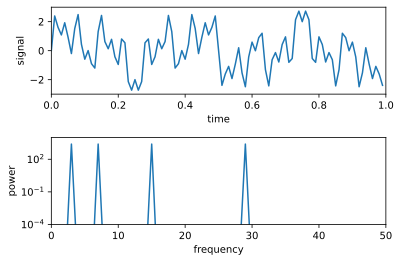

In [47]:
fs = 100.0
f1 = 7.0
f2 = 15.0
f3 = 29.0
f4 = 42.0
x0 = 0.0
x1 = 1.0

x = torch.arange(x0, x1, 1/fs, dtype=torch.float32)
N = x.size(dim=0)
y = torch.sin(2*math.pi*f0*x) + torch.sin(2*math.pi*f1*x) + torch.sin(2*math.pi*f2*x) + torch.sin(2*math.pi*f3*x)

z = abs(fft.fftshift(fft.fft(y))) ** 2
# f = fft.fftfreq(N, fs)
f = torch.arange(-fs/2, fs/2, fs/N)

fig, (ax1, ax2) = plt.subplots(2, 1)
fig.subplots_adjust(hspace=0.5) # make extra space between the subplots

ax1.plot(x, y)
ax1.set_xlim(x0, x1)
ax1.set_xlabel('time')
ax1.set_ylabel('signal')

ax2.semilogy(f, z)
ax2.set_xlim(0, fs/2)
ax2.set_xlabel('frequency')
ax2.set_ylabel('power')
ax2.set_ylim(1.0e-4, 1.0e4)

fig.savefig('Plots/four_sines.svg')
files.download('Plots/four_sines.svg')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

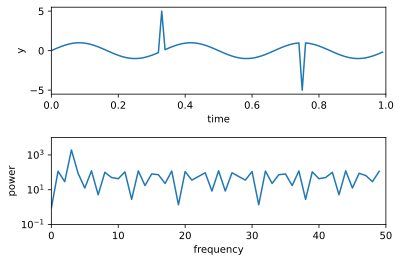

In [49]:
fs = 100
f0 = 3.0
x0 = 0.0
x1 = 1.0

x = torch.arange(x0, x1, 1/fs, dtype=torch.float32)
N = x.size(dim=0)
y = torch.sin(2*math.pi*f0*x)
y[ int(math.floor(N*1/3))] = 5.0
y[ int(math.floor(N*3/4))] = -5.0

z = abs(fft.fftshift(fft.fft(y))) ** 2
# f = fft.fftfreq(N, fs)
f = torch.arange(-fs/2, fs/2, fs/N)

fig, (ax1, ax2) = plt.subplots(2, 1)
fig.subplots_adjust(hspace=0.5) # make extra space between the subplots

ax1.plot(x, y)
ax1.set_xlim(x0, x1)
ax1.set_xlabel('time')
ax1.set_ylabel('y')

ax2.semilogy(f, z)
ax2.set_xlim(0, fs/2)
ax2.set_xlabel('frequency')
ax2.set_ylabel('power')
ax2.set_ylim(1.0e-1, 1.0e4)

fig.savefig('Plots/spike_plus_sine.svg')
files.download('Plots/spike_plus_sine.svg')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

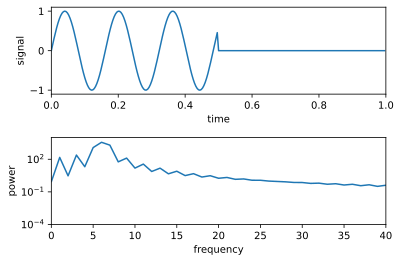

In [61]:
fs = 250.0
f1 = 6.2
x0 = 0.0
x1 = 1.0

x = torch.arange(x0, x1, 1/fs, dtype=torch.float32)
N = x.size(dim=0)
y = torch.sin(2*math.pi*f1*x)
y[ int(math.floor(N*1/2)):] = 0.0

z = abs(fft.fftshift(fft.fft(y))) ** 2
# f = fft.fftfreq(N, fs)
f = torch.arange(-fs/2, fs/2, fs/N)

fig, (ax1, ax2) = plt.subplots(2, 1)
fig.subplots_adjust(hspace=0.5) # make extra space between the subplots

ax1.plot(x, y)
ax1.set_xlim(x0, x1)
ax1.set_xlabel('time')
ax1.set_ylabel('signal')

ax2.semilogy(f, z)
ax2.set_xlim(0, 40)
ax2.set_xlabel('frequency')
ax2.set_ylabel('power')
ax2.set_ylim(1.0e-4, 1.0e4)

fig.savefig('Plots/half_sine.svg')
files.download('Plots/half_sine.svg')
